In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("default")

In [3]:
af = pd.read_csv("AF_stars_full_table.csv", dtype={'kic': np.int64})
berg = pd.read_csv("../../dsct exoplanet/data/catalogues/berger_2020.tsv", delimiter='\t', dtype={'KIC': np.int64})

In [4]:
df = pd.merge(af, berg, left_on='kic', right_on='KIC')

(10000.0, 6500.0)

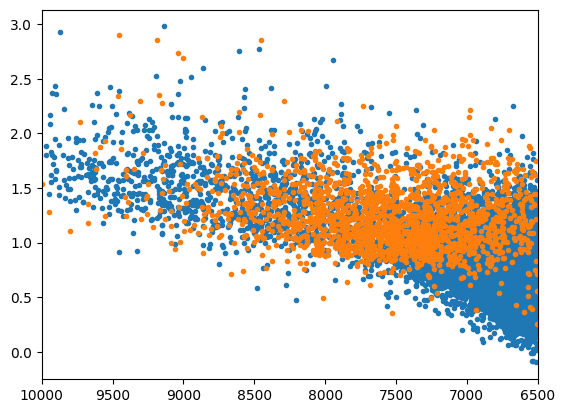

In [5]:
m = af.pulsating == 0
plt.plot(af[m].Teffi, af[m].loglbol_g_mean, '.')

m = af.pulsating == 1.
plt.plot(af[m].Teffi, af[m].loglbol_g_mean, '.')

plt.xlim(10000, 6500)

In [8]:
from scipy import stats

In [70]:
plt.style.use('default')


In [9]:
# plt.rcParams.update({'font.size': 15})
plt.rc('font', size=12)          # controls default text sizes
# plt.rcParams.update({'font.serif': 'Palatino'})
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

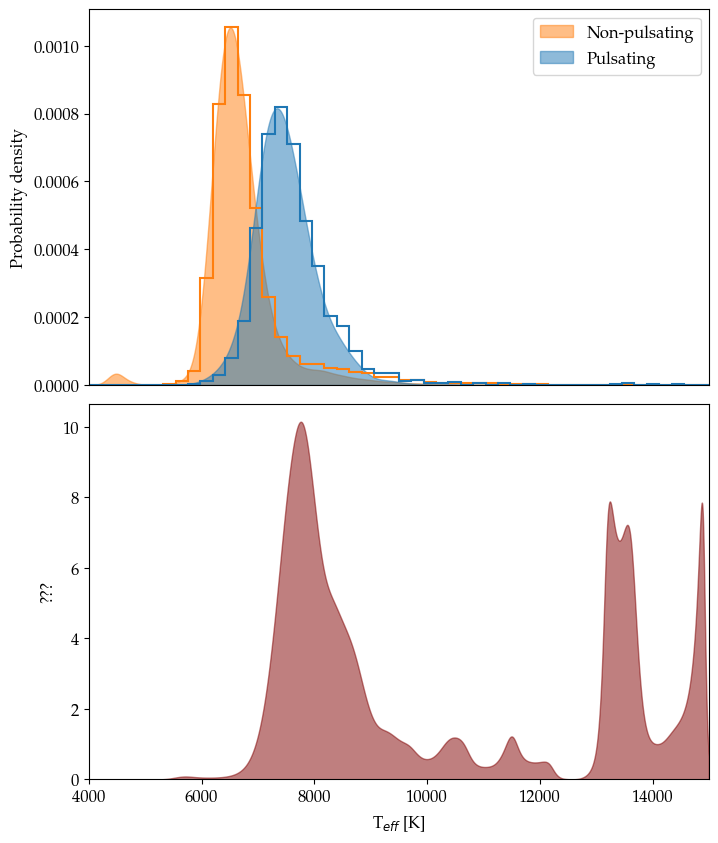

In [30]:
fig, axes = plt.subplots(2,1, figsize=[8,10])

ax = axes[0]
x_non, x = df[df.pulsating == 0].Teff.values, df[df.pulsating == 1].Teff.values

xmin, xmax = 4000, 11000
x_d = np.linspace(xmin, xmax, 10000)
ax.hist(x_non, bins=50, range=(xmin, xmax), density=True, lw=1.5, histtype='step', color='C1');
ax.hist(x, bins=50, range=(xmin, xmax), density=True, alpha=1, lw=1.5, histtype='step', color='C0');

m = df.pulsating == 0
err = np.sqrt((np.abs(df[m].e_Teff) + np.abs(df[m].E_Teff)) / np.abs(df[m].Teff))**2
kernel_non = stats.gaussian_kde(x_non, 
                                weights=1/(err**2)
                               )
v_non = kernel_non(x_d)
ax.fill_between(x_d, v_non, alpha=0.5,  color='C1', label='Non-pulsating')

m = df.pulsating == 1
err = np.sqrt((np.abs(df[m].e_Teff) + np.abs(df[m].E_Teff)) / np.abs(df[m].Teff))**2
kernel = stats.gaussian_kde(x, 
                            weights=1/(err**2)
                           )
v = kernel(x_d)
ax.fill_between(x_d, v, alpha=0.5, color='C0', label='Pulsating')

ax.legend()
# ax.set_xlabel('T$_{eff}$ [K]')
ax.set_xticks([])
ax.set_ylabel('Probability density')
ax.set_xlim(xmin, xmax)

ax = axes[1]
ax.fill_between(x_d, (v / v_non), alpha=0.5, color='maroon')
ax.set_xlabel('T$_{eff}$ [K]')
ax.set_ylabel('???')
ax.set_xlim(xmin, xmax)
ax.set_ylim(0, None)
plt.subplots_adjust(hspace=0.05)

# plt.savefig('rando/teff_frac.png', dpi=300, bbox_inches='tight')

In [82]:
m = df.pulsating == 0
x, y = df[m].Teff, df[m].loglbol_g_mean

xmin, xmax, ymin, ymax = 6000, 11000, 0, 2.5
X, Y = np.mgrid[xmin:xmax:100j,ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
# err = np.sqrt(((np.abs(df[m].e_Teff) + np.abs(df[m].E_Teff)) / np.abs(df[m].Teff))**2 + ((np.abs(df[m].e_Lum) + np.abs(df[m].E_Lum)) / np.abs(df[m].Lum))**2)
err = np.sqrt(((np.abs(df[m].e_Teff) + np.abs(df[m].E_Teff)) / np.abs(df[m].Teff))**2 + (np.abs(df[m].loglbol_g_std)/ np.abs(df[m].loglbol_g_mean))**2)
kernel = stats.gaussian_kde(values, 
                            weights=1/(err**2)
                           )
Z = np.reshape(kernel(positions).T, X.shape)

In [83]:
m = df.pulsating == 1
x, y = df[m].Teff, df[m].loglbol_g_mean

X, Y = np.mgrid[xmin:xmax:100j,ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([x, y])
err = np.sqrt(((np.abs(df[m].e_Teff) + np.abs(df[m].E_Teff)) / np.abs(df[m].Teff))**2 + (np.abs(df[m].loglbol_g_std)/ np.abs(df[m].loglbol_g_mean))**2)
kernel_pulsating = stats.gaussian_kde(values, 
                                      weights=1/(err**2)
                                     )
Z_pulsating = np.reshape(kernel_pulsating(positions).T, X.shape)

In [84]:
# Stellar tracks
Lcolnames = ["T11", "L11", "G11", "T12", "L12", "G12", "T13", "L13", "G13", "T14", "L14", "G14", "T15", "L15", "G15", "T16", "L16", "G16", "T17", "L17", "G17", "T18", "L18", "G18", "T19", "L19", "G19", "T20", "L20", "G20", "T21", "L21", "G21", "T22", "L22", "G22", "T23", "L23", "G23", "T24", "L24", "G24", "T25", "L25", "G25"]
Ltracks = pd.read_csv("../../dsct exoplanet/data/tracks/mesa10108_as09_opal_exp150_mlt180_D000_z140x071_orig.csv",  header=None, sep=" ", names=Lcolnames, skiprows=([0]))
msL = pd.DataFrame(data={"Tms": Ltracks.loc[0][0::3].values, "Lms": Ltracks.loc[0][1::3].values, "Gms": Ltracks.loc[0][2::3].values})

In [85]:
plt.style.use('default')

# plt.rcParams.update({'font.size': 15})
plt.rc('font', size=12)          # controls default text sizes
# plt.rcParams.update({'font.serif': 'Palatino'})
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

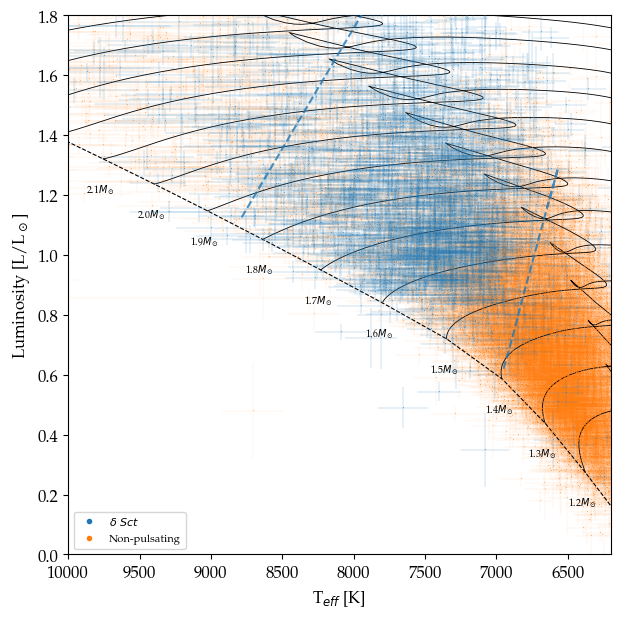

In [86]:
fig, axes = plt.subplots(#2,2,
                         #gridspec_kw={'height_ratios':[0.1, 1], 'width_ratios':[1, 0.1]}
    figsize=[7,7]

)
# ax = axes
# axes = axes.flatten()
# im = ax.imshow(np.rot90(Z_pulsating), cmap='Blues',
#           extent=[xmin, xmax, ymin, ymax], aspect='auto')
# cset = ax.contour(X, Y,Z_pulsating, cmap='Blues')
# plt.clabel(cset, fontsize=7)
# cset = ax.contour(X, Y, Z, cmap='Oranges')
# plt.clabel(cset, fontsize=7)
# plt.colorbar(cset)

# m = df.pulsating == 1
# x, y = df[m].Teff, df[m].Lum
# ax.plot(x, y, '.', markersize=1, alpha=1, c='C0')

ax = axes
m = df.pulsating == 1
ax.errorbar(df[m].Teff, df[m].loglbol_g_median, yerr=df[m].loglbol_g_std, xerr=df[m].e_Teff, elinewidth=0.3, fmt=',', markersize=2, alpha=0.5, c='C0', zorder=50, rasterized=True)

m = df.pulsating == 0
# ax.errorbar(df[m].Teff, df[m].loglbol_g_median, fmt=',', markersize=1, alpha=1, c='C1')
ax.errorbar(df[m].Teff, df[m].loglbol_g_median, yerr=df[m].loglbol_g_std, xerr=df[m].e_Teff, elinewidth=0.1,fmt=',', markersize=1, alpha=0.5, c='C1', rasterized=True)


for n, mass in zip(np.arange(0,len(Lcolnames)/3), np.arange(1.1,2.7,0.1)):
    ax.plot(Ltracks.iloc[:,int(3*n+0)],Ltracks.iloc[:,int(3*n+1)],c='black',linewidth=0.6)
    if (mass > 1.2) & (mass < 2.2):
        ax.text(Ltracks.iloc[:,int(3*n+0)][0]+20, Ltracks.iloc[:,int(3*n+1)][0]-0.1, str(np.round(mass,2))+r'$M_\odot$', c='black',horizontalalignment='center',verticalalignment='center', fontsize=7)
ax.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')

Linsta_cols = ["dsctbT", "dsctbL", "dsctbG", "dsctrT", "dsctrL", "dsctrG", "gdorbT", "gdorbL", "gdorbG", "gdorrT", "gdorrL", "gdorrG"]
Linsta = pd.read_csv("data/instability.txt", header=None, sep="\t", names=Linsta_cols)

ax.plot(Linsta["dsctbT"],Linsta["dsctbL"],c='C0', linestyle='dashed', zorder=100, alpha=0.8)
ax.plot(Linsta["dsctrT"],Linsta["dsctrL"],c='C0', linestyle='dashed', zorder=100, alpha=0.8)

ax.set_xlim([10000, 6200])
ax.set_ylim([0, 1.8])
ax.set_xlabel('T$_{eff}$ [K]')
ax.set_ylabel('Luminosity [L/L$_\odot$]')

ax.plot(0,0,'.',c='C0', label=r'$\delta~Sct$')
ax.plot(0,0,'.',c='C1', label='Non-pulsating')
ax.legend(fontsize=8)

# plt.savefig('rando/dsct_hrd.png', dpi=300, bbox_inches='tight')

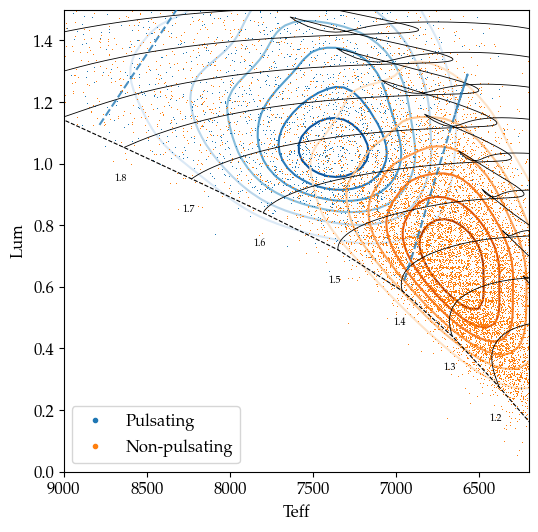

In [87]:
fig, ax = plt.subplots(figsize=[6,6])

# im = ax.imshow(np.rot90(Z_pulsating), cmap='Blues',
#           extent=[xmin, xmax, ymin, ymax], aspect='auto')
cset = ax.contour(X, Y,Z_pulsating, cmap='Blues')
# plt.clabel(cset, fontsize=7)
cset = ax.contour(X, Y, Z, cmap='Oranges')
# plt.clabel(cset, fontsize=7)
# plt.colorbar(cset)

m = df.pulsating == 1
x, y = df[m].Teff, df[m].Lum
ax.plot(x, y, ',', markersize=1, alpha=1, c='C0')

m = df.pulsating == 0
x, y = df[m].Teff, df[m].Lum
ax.plot(x, y, ',', markersize=1, alpha=1, c='C1')

for n, mass in zip(np.arange(0,len(Lcolnames)/3), np.arange(1.1,2.7,0.1)):
    plt.plot(Ltracks.iloc[:,int(3*n+0)],Ltracks.iloc[:,int(3*n+1)],c='black',linewidth=0.6)
    if (mass > 1.2) & (mass < 1.9):
        plt.text(Ltracks.iloc[:,int(3*n+0)][0]+20, Ltracks.iloc[:,int(3*n+1)][0]-0.1, str(np.round(mass,2)), c='black',horizontalalignment='center',verticalalignment='center', fontsize=7)
plt.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')

Linsta_cols = ["dsctbT", "dsctbL", "dsctbG", "dsctrT", "dsctrL", "dsctrG", "gdorbT", "gdorbL", "gdorbG", "gdorrT", "gdorrL", "gdorrG"]
Linsta = pd.read_csv("data/instability.txt", header=None, sep="\t", names=Linsta_cols)

ax.plot(Linsta["dsctbT"],Linsta["dsctbL"],c='C0', linestyle='dashed', zorder=100, alpha=0.8)
ax.plot(Linsta["dsctrT"],Linsta["dsctrL"],c='C0', linestyle='dashed', zorder=100, alpha=0.8)

ax.set_xlim([9000, 6200])
ax.set_ylim([0, 1.5])
ax.set_xlabel('Teff')
ax.set_ylabel('Lum')

ax.plot(0,0,'.',c='C0', label='Pulsating')
ax.plot(0,0,'.',c='C1', label='Non-pulsating')
ax.legend()

# plt.savefig('rando/2d_frac.png', dpi=300, bbox_inches='tight')


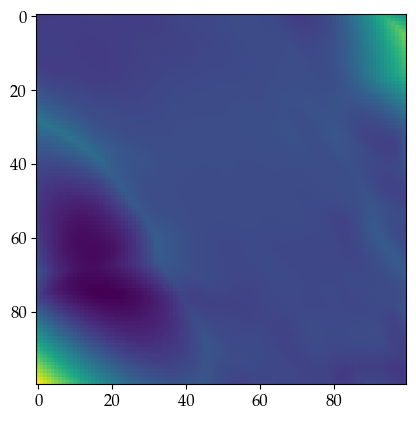

In [88]:
frac = np.log(Z_pulsating) - np.log(Z)
plt.imshow(frac)

(0.0, 2.5)

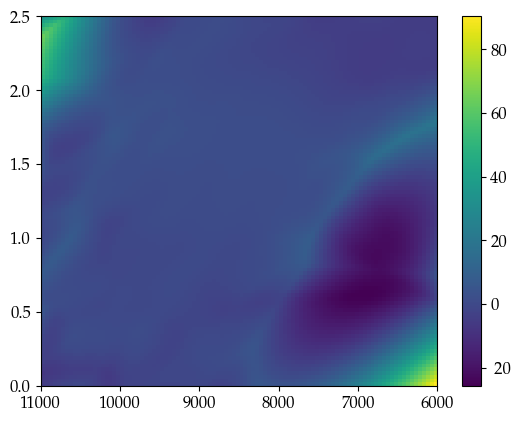

In [89]:
fig, ax = plt.subplots()
frac = (Z_pulsating) / (Z)
im = ax.imshow(np.log(frac), cmap='viridis',
          extent=[xmin, xmax, ymin, ymax], aspect='auto')
plt.colorbar(im)

ax.set_xlim([xmax, xmin])
ax.set_ylim([ymin, ymax])
# ax.set_xlabel('Teff')
# ax.set_ylabel('Lum')
# ax.set
# plt.show()

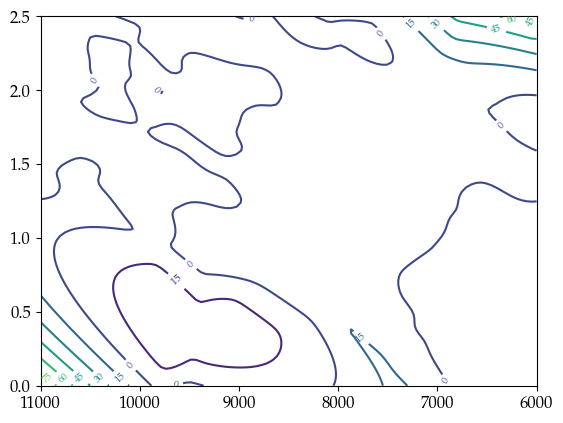

In [95]:
fig, ax = plt.subplots()
cset = ax.contour(X, Y,(np.log(Z_pulsating / Z)))
# ax.contour(X, Y,Z_pulsating, cmap='Blues')
plt.clabel(cset, fontsize=7)

# ax.set_xlim([9000, 6200])
ax.invert_xaxis()

In [ ]:
cset = ax.contour(X, Y,Z_pulsating, cmap='Blues')
# plt.clabel(cset, fontsize=7)
cset = ax.contour(X, Y, Z, cmap='Oranges')

(6500.0, 10000.0)

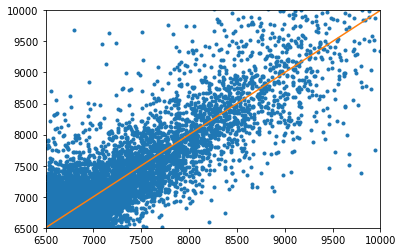

In [46]:
plt.plot(df.Teffi, df.Teff, '.')
plt.plot([6500, 10000], [6500, 10000])
plt.xlim(6500, 10000)
plt.ylim(6500, 10000)

In [55]:
plt.style.use('science')

[(6500.0, 10000.0),
 (-4000.0, 4000.0),
 Text(0.5, 0, 'Teff_{Murphy}'),
 Text(0, 0.5, 'Teff_{Murphy} - Teff_{Berger}')]

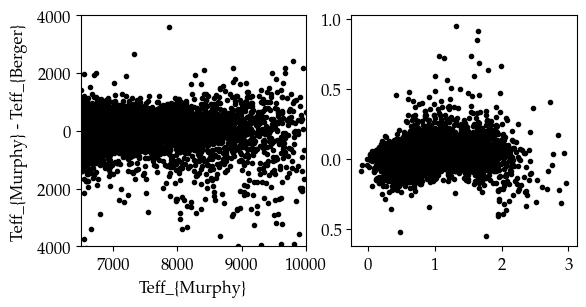

In [21]:
fig, axes = plt.subplots(1,2, figsize=[6.4,3])
axes = axes.flatten()

ax = axes[1]
ax.plot(df.loglbol_g_median, df.loglbol_g_median - df.Lum, '.k')


ax = axes[0]
ax.plot(df.Teffi, df.Teffi - df.Teff, '.k')
ax.set(xlim=[6500, 10000], ylim=[-4000, 4000], xlabel='Teff_{Murphy}', ylabel='Teff_{Murphy} - Teff_{Berger}')

In [32]:
af.columns

Index(['kic', 'pulsating', 'freq', 'amp', 'V_UBV', 'Av_1', 'Av_sig_p',
       'Av_sig_m', 'astrometric_excess_noise', 'skewness', 'snr95', 'snrmed',
       'EBS_or_RRL', 'kic_dec', 'kic_umag', 'kic_gmag', 'kic_rmag', 'kic_imag',
       'kic_zmag', 'kic_degree_ra', 'gaia_source_id', 'gaia_ra',
       'gaia_ra_error', 'gaia_dec', 'dec_error', 'parallax', 'parallax_error',
       'gaia_phot_g_mean_mag_x', 'gaia_a_g_val', 'Teffi', 'e_Teffi', 'r_Teffi',
       'loggi', 'e_loggi', 'FeHi', 'e_FeHi', 'Green_2017', 'Green_2017_sigma',
       'sdss_g', 'Av_Green_2017', 'Av_Green_2017_sigma', 'Ag_Green_2017',
       'Ag_Green_2017_sigma', 'BC_g', 'BC_V_flower', 'loglbol_g', 'loglbol_V',
       'loglbol_g_mean', 'loglbol_g_median', 'loglbol_g_upper_percentile',
       'loglbol_g_lower_percentile', 'loglbol_g_std', 'absolute_magnitude_V',
       'absolute_magnitude_g', 'loglbol_sigp', 'loglbol_sigm',
       'frac_parallax_err', 'loglbol_V_median', 'loglbol_V-g', 'new_mass',
       'mass_qflag', 'ne

In [26]:
af[~af.kic.isin(berg.KIC)]

,kic,pulsating,freq,amp,V_UBV,Av_1,Av_sig_p,Av_sig_m,astrometric_excess_noise,skewness,...,loglbol_V-g,new_mass,mass_qflag,new_mass_std,new_radius,new_logg,new_r_std,new_logg_std,dSct,zams_flag
12,1162150,1.0,16.407943,1.693038,NaN,0.506,0.013,0.242,NaN,46.934206,...,NaN,1.90,0,0.25,3.95,3.52,0.31,0.09,1,0
54,1434800,0.0,17.367344,0.007735,14.038,0.545,0.036,0.078,0.324607,0.705661,...,-0.054888,1.56,0,0.25,2.51,3.83,0.30,0.12,0,0
59,1570023,1.0,15.927220,1.907321,13.545,0.491,0.041,0.030,0.000000,36.397285,...,-0.053983,1.72,0,0.25,3.31,3.63,0.26,0.09,1,0
78,1718222,0.0,40.394676,0.002186,NaN,0.264,0.074,0.120,0.143607,1.363026,...,NaN,1.63,0,0.25,1.78,4.14,0.07,0.08,0,0
149,2163636,0.0,30.136236,0.005183,13.401,0.436,0.064,0.096,0.000000,0.609278,...,-0.055745,1.18,0,0.25,1.40,4.21,0.10,0.12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13982,12118444,0.0,16.965144,0.017662,16.262,0.416,0.000,0.005,0.000000,0.736870,...,-0.888291,1.30,1,0.25,1.40,4.26,0.12,0.11,0,0
14071,12204647,0.0,31.927911,0.026781,12.925,0.268,0.032,0.039,0.000000,1.517598,...,-0.018156,1.27,5,0.25,1.18,4.40,0.10,0.12,0,1
14183,12353867,0.0,19.203673,0.039549,15.326,0.326,0.050,0.050,0.177126,0.602281,...,-0.038179,1.86,2,0.25,1.52,4.33,0.25,0.16,0,0
14220,12417360,0.0,31.389656,0.003849,12.137,0.306,0.044,0.066,0.000000,0.768358,...,-0.044399,1.22,2,0.25,1.20,4.36,0.08,0.11,0,0


In [23]:
berg[berg.KIC == '1162150']

,KIC,Mass,E_Mass,e_Mass,Teff,E_Teff,e_Teff,logg,E_logg,e_logg,...,Age,f_Age,E_Age,e_Age,Dist,E_Dist,e_Dist,Avmag,GOF,TAMS


In [3]:
af

,kic,pulsating,freq,amp,V_UBV,Av_1,Av_sig_p,Av_sig_m,astrometric_excess_noise,skewness,...,loglbol_V-g,new_mass,mass_qflag,new_mass_std,new_radius,new_logg,new_r_std,new_logg_std,dSct,zams_flag
0,892667,0.0,17.844223,0.007057,13.228,0.471,0.054,0.101,0.000000,0.735795,...,-0.029245,1.46,0,0.25,2.25,3.89,0.16,0.10,0,0
1,892828,0.0,18.003054,0.005777,13.292,0.476,0.060,0.090,0.011050,0.734706,...,-0.026766,1.34,0,0.25,1.77,4.07,0.13,0.11,0,0
2,893234,0.0,13.342990,0.005637,NaN,0.454,0.058,0.087,0.000000,0.625803,...,NaN,1.29,0,0.25,1.63,4.11,0.12,0.11,0,0
3,1026133,0.0,31.264079,0.006450,13.219,0.492,0.044,0.075,0.093332,0.679167,...,-0.038360,1.46,0,0.25,1.93,4.02,0.14,0.10,0,0
4,1026255,1.0,16.615259,0.031939,12.585,0.563,0.009,0.072,0.000000,4.309565,...,-0.046476,1.64,0,0.25,2.49,3.85,0.18,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14326,12884588,0.0,5.155487,0.005922,12.771,0.307,0.009,0.017,0.000000,0.647262,...,-0.052892,1.46,0,0.25,1.73,4.13,0.14,0.10,0,0
14327,12885086,1.0,26.871816,0.526915,10.791,0.288,0.016,0.041,0.051577,44.712829,...,-0.033295,1.71,0,0.25,1.99,4.07,0.16,0.09,1,0
14328,12885346,0.0,6.811033,0.021516,14.093,0.325,0.050,0.050,0.200022,0.673898,...,-0.059415,2.18,0,0.25,2.16,4.11,0.24,0.11,0,0
14329,12934616,0.0,21.436315,0.015400,12.167,0.280,0.026,0.039,0.000000,0.643507,...,-0.041862,1.46,0,0.25,2.23,3.91,0.18,0.10,0,0
